In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [3]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['TSM', 'MSFT', 'JPM', 'VZ', 'T', 'JNJ', 'AAPL', 'KO', 'VOO', 'FB']

In [24]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [25]:
#Assign weights to the stocks.
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) #20 percent each

In [26]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [27]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [28]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-06'

In [29]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [30]:
#Show the df
df

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
Date,,,,,,,,,,
2012-01-03,9.682548,21.623135,26.197287,25.048031,16.578936,49.344902,12.575917,25.443985,96.230011,NaN
2012-01-04,9.594923,22.132010,26.363228,24.720198,16.606224,49.045292,12.643503,25.284380,96.395073,NaN
2012-01-05,9.682548,22.358185,26.913879,24.549971,16.589846,48.985378,12.783871,25.164665,96.708687,NaN
2012-01-06,9.602225,22.705503,26.672499,24.479723,16.434805,48.558437,12.917512,25.005049,96.510620,NaN
2012-01-09,9.770172,22.406639,26.627235,24.505264,16.423731,48.633335,12.897020,25.005049,96.659157,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-30,106.730003,313.859985,139.505920,51.610001,24.139999,179.589996,177.770004,62.209999,421.649994,227.850006
2022-03-31,104.260002,308.309998,135.316986,50.939999,23.629999,177.229996,174.610001,62.000000,415.170013,222.360001
2022-04-01,102.790001,309.420013,134.314407,52.119999,23.980000,178.190002,174.309998,62.869999,416.320007,224.850006


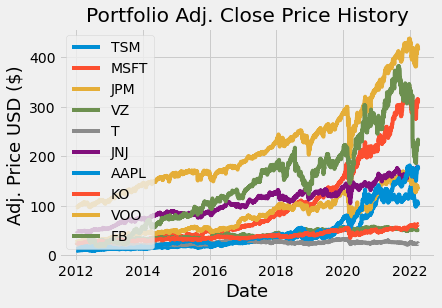

In [31]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [32]:
#Show the daily simply return
returns = df.pct_change()
returns

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
Date,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.009050,0.023534,0.006334,-0.013088,0.001646,-0.006072,0.005374,-0.006273,0.001715,NaN
2012-01-05,0.009132,0.010219,0.020887,-0.006886,-0.000986,-0.001222,0.011102,-0.004735,0.003253,NaN
2012-01-06,-0.008296,0.015534,-0.008969,-0.002861,-0.009346,-0.008716,0.010454,-0.006343,-0.002048,NaN
2012-01-09,0.017490,-0.013163,-0.001697,0.001043,-0.000674,0.001542,-0.001586,0.000000,0.001539,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-30,-0.023066,-0.004914,-0.004533,0.007024,0.006253,0.010408,-0.006650,0.000804,-0.006222,-0.008744
2022-03-31,-0.023143,-0.017683,-0.030027,-0.012982,-0.021127,-0.013141,-0.017776,-0.003376,-0.015368,-0.024095
2022-04-01,-0.014099,0.003600,-0.007409,0.023165,0.014812,0.005417,-0.001718,0.014032,0.002770,0.011198


In [33]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
TSM,0.079990,0.034610,0.029844,0.010779,0.014961,0.014402,0.037112,0.014216,0.027391,0.032316
MSFT,0.034610,0.065911,0.031259,0.014285,0.017019,0.018931,0.041569,0.017986,0.031782,0.042524
JPM,0.029844,0.031259,0.071774,0.017188,0.026008,0.019604,0.029318,0.021680,0.032810,0.028722
VZ,0.010779,0.014285,0.017188,0.029842,0.023186,0.013755,0.011035,0.014491,0.013857,0.010287
T,0.014961,0.017019,0.026008,0.023186,0.039919,0.015460,0.016599,0.017401,0.018845,0.013391
JNJ,0.014402,0.018931,0.019604,0.013755,0.015460,0.029312,0.016405,0.015334,0.017474,0.015551
AAPL,0.037112,0.041569,0.029318,0.011035,0.016599,0.016405,0.080657,0.016002,0.031240,0.043344
KO,0.014216,0.017986,0.021680,0.014491,0.017401,0.015334,0.016002,0.030788,0.017679,0.013242
VOO,0.027391,0.031782,0.032810,0.013857,0.018845,0.017474,0.031240,0.017679,0.027098,0.031041
FB,0.032316,0.042524,0.028722,0.010287,0.013391,0.015551,0.043344,0.013242,0.031041,0.142911


In [34]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.025820751484095

In [35]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.1606883676066659

In [36]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.18530531377399637

In [37]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 19.0%
Annual volatility / risk: 16.0%
Annual variance: 3.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [38]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [39]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('TSM', 0.18469), ('MSFT', 0.41688), ('JPM', 0.0), ('VZ', 0.0), ('T', 0.0), ('JNJ', 0.15809), ('AAPL', 0.24034), ('KO', 0.0), ('VOO', 0.0), ('FB', 0.0)])
Expected annual return: 26.3%
Annual volatility: 20.3%
Sharpe Ratio: 1.20


(0.26329824161715887, 0.20275925347570697, 1.1999365624331861)

In [40]:
#Highlight total  copy and paste and must add to 1 



In [20]:
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)


allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 1, 'NFLX': 5, 'RBLX': 29, 'SQ': 4, 'NVDA': 1}
Funds remaining: $7.31
